<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/tst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
import math
from numpy import exp

# Resolver a equação através dos métodos pseudoespectrais:


N = 100

L0 = 2

col = np.cos(np.arange(N)*math.pi / N)

T = np.zeros([N+2,N])
xT = np.zeros([N+2,N])
xxT = np.zeros([N+2,N])


T[0,] = 1
T[1,] = col


for i in (range(2,N+2)):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

xT[0,] = 0
xT[1,] = 1

for i in (range(2,N+2)):
  xT[i,] = 2*col*xT[i-1,] + 2*T[i-1,] - xT[i-2,]


xxT[0,] = 0
xxT[1,] = 0

for i in (range(2,N+2)):
  xxT[i,] = 2*xT[i-1,] + 2*col*xxT[i-1,] + 2*xT[i-1] - xxT[i-2,]


psi = T[2:N+2,:] - T[0:N,:] 

xpsi = xT[2:N+2,:] - xT[0:N,:] 

xxpsi = xxT[2:N+2,:] - xxT[0:N,:]



K = exp(col) - (4*exp(1))/(1+exp(2))

eq = xxpsi - 4*xpsi + 4*psi

alpha = np.dot(K, np.linalg.inv(eq))  # coeficientes modais (depende da equação a ser solucionada aplicada à psi, e de K)

#f = (exp(x) + exp(x+2) - exp(2*x+1))/(1+exp(2)) - exp(1)/(1 + exp(2))




In [4]:
# plot

M = 300

xplot = np.linspace(-1,1,M)

colplot = np.linspace(-1,1,M)



Tplot = np.zeros([N+2,M])
xTplot = np.zeros([N+2,M])
xxTplot = np.zeros([N+2,M])



Tplot[0,] = 1
Tplot[1,] = colplot



for i in (range(2,N+2)):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]



psiplot = Tplot[2:N+2,:] - Tplot[0:N,:] 

np.shape(psiplot)

u_ap = np.dot(alpha, psiplot)   # solução aproximada

f = (exp(xplot)+exp(xplot+2)-exp(2*xplot+1))/(1+exp(2)) - exp(1)/(1+exp(2))


erro = abs(u_ap - f)





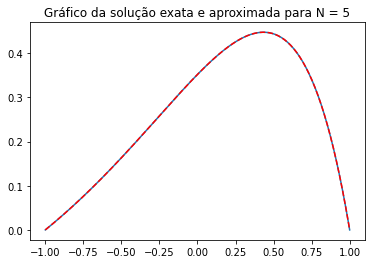

In [5]:
plt.plot(xplot, f)
plt.plot(xplot, u_ap, "--r")
plt.title("Gráfico da solução exata e aproximada para N = 5")
plt.show()


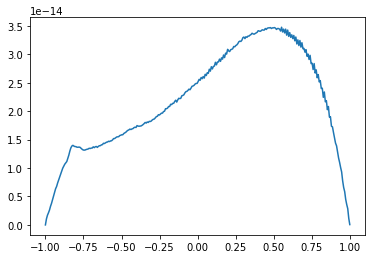

In [6]:
plt.plot(xplot, erro)
plt.show()